# Unit 6 Day 2 - Analyze & Visualize NYT's Live COVID-19 Dataset

The NYT has been closely following the pandemic, and their data is updated daily.
This means that we cannot rely on a local .csv file. We must read in something other than a .csv file.

First, load all the libraries that we plan on using for dataframes and plotting data.

In [ ]:
import pandas as pd #Use dataframes and read csv
import matplotlib.pyplot as plt #Visualization
from matplotlib.dates import DateFormatter #for usage with dates


%matplotlib inline

Now, read in the data using the NYT's "us.csv" **link**.
Find it in this repository: https://github.com/nytimes/covid-19-data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv", parse_dates=['date'])

Display the first 5 rows to see what you are working with.

In [ ]:
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


Display the last 5 rows to see what the latest data is.

In [ ]:
df.tail()

,date,cases,deaths
206,2020-08-14,5322232,168335
207,2020-08-15,5372971,169395
208,2020-08-16,5415114,169909
209,2020-08-17,5455136,170451
210,2020-08-18,5498362,171800


## Plot the Number of Cases in the US
We will be focusing on the number of cases in the US, first. Therefore, we will not need the # of deaths column for right now. Use the .loc attribute select the columns we do want.

In [ ]:
df_cases = df.loc[:, ["date","cases"]] #.loc[rows, cloumns]#the colon means select all(rows)

Display the first and last rows of the dataframe.

In [ ]:
df_cases.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


In [ ]:
df_cases.tail()

,date,cases
206,2020-08-14,5322232
207,2020-08-15,5372971
208,2020-08-16,5415114
209,2020-08-17,5455136
210,2020-08-18,5498362


Plot the number of cases over time using .plot and .bar

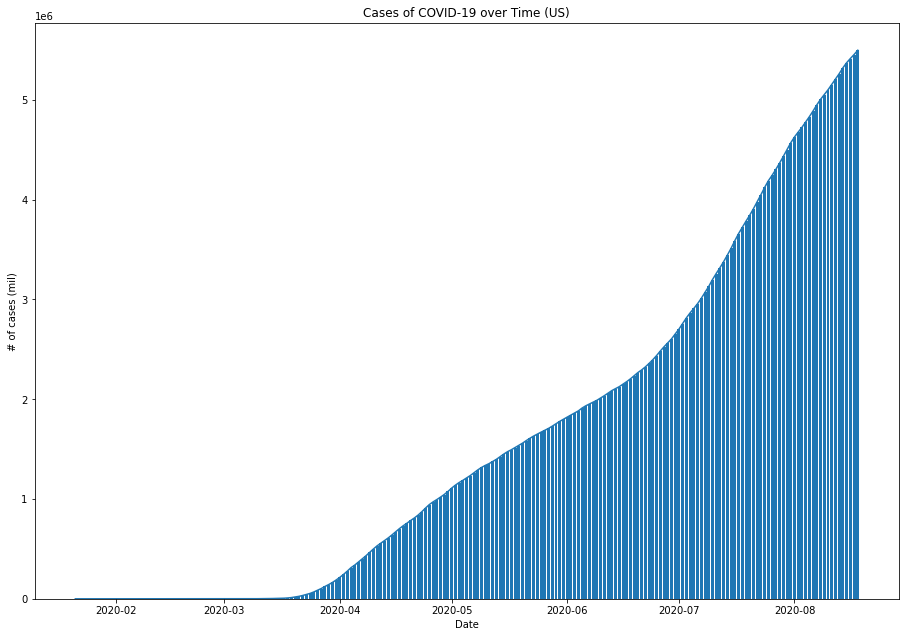

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])#starting point on x-axis, starting point on y-axis, length, width
dates = df_cases["date"] #x-values
cases = df_cases["cases"]
plt.plot(dates, cases)
plt.bar(dates, cases)
plt.xlabel("Date")
plt.ylabel("# of cases (mil)")
plt.title("Cases of COVID-19 over Time (US)")
plt.show()

## Plot the Number of Deaths in the US

Using the .loc attribute on the NYT dataset, plot the number of deaths in the US as a result of COVID-19.

In [ ]:
df_deaths = df.loc[:, ["date","deaths"]] #.loc[rows, cloumns]#the colon means select all(rows)

In [ ]:
df_deaths.head()

,date,deaths
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0


In [ ]:
df_deaths.tail()

,date,deaths
206,2020-08-14,168335
207,2020-08-15,169395
208,2020-08-16,169909
209,2020-08-17,170451
210,2020-08-18,171800


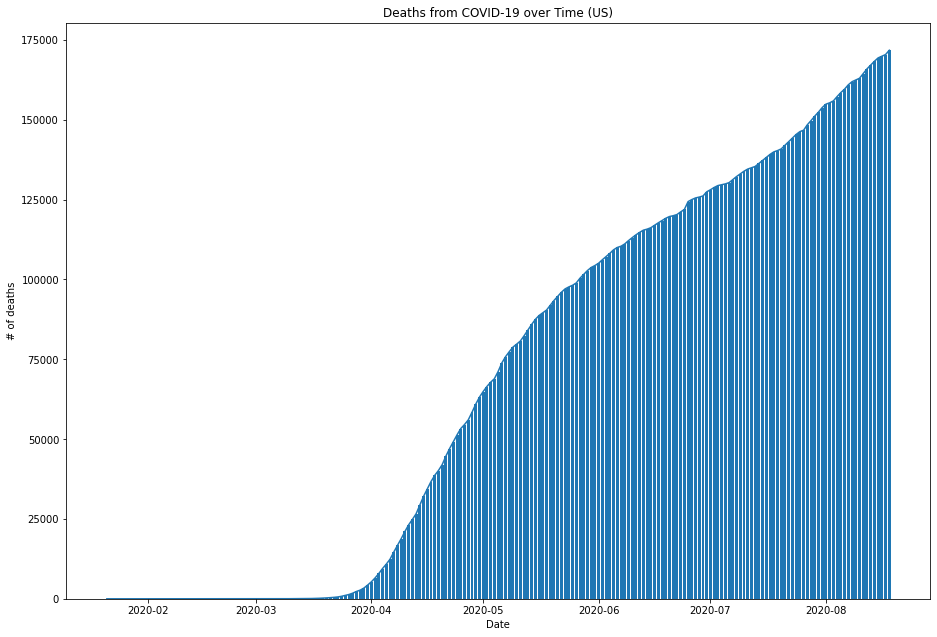

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])#starting point on x-axis, starting point on y-axis, length, width
dates = df_deaths["date"] #x-values
deaths = df_deaths["deaths"]
plt.plot(dates, deaths)
plt.bar(dates, deaths)
plt.xlabel("Date")
plt.ylabel("# of deaths")
plt.title("Deaths from COVID-19 over Time (US)")
plt.show()

In [ ]:
def dataVisualization(df, column1, column2):

  fig = plt.figure()
  ax = fig.add_axes([0,0,2,2])
  dates = df[column1] #date is used for the dates in the dataframe
  column2 = df[column2] #column2 is dependent on the name entered in the parameters
  plt.plot(dates, column2)
  plt.bar(dates, column2)
  
    if column2 == "cases": #the conditional is used to reassign variables with preferred capitalization
    focus = "Cases" 
  elif column2 == "deaths":
    focus = "Deaths"
  if column1 == "date":
    time_period = "Date"

  plt.xlabel(time_period)#time period refers to the title of the x-axis, Date
  plt.ylabel("# of " + focus)#focus refers to the factor being monitored
  plt.title("COVID-19 " + focus + " over Time (US)")
  plt.show()


  return fig, plt.bar, plt.plot

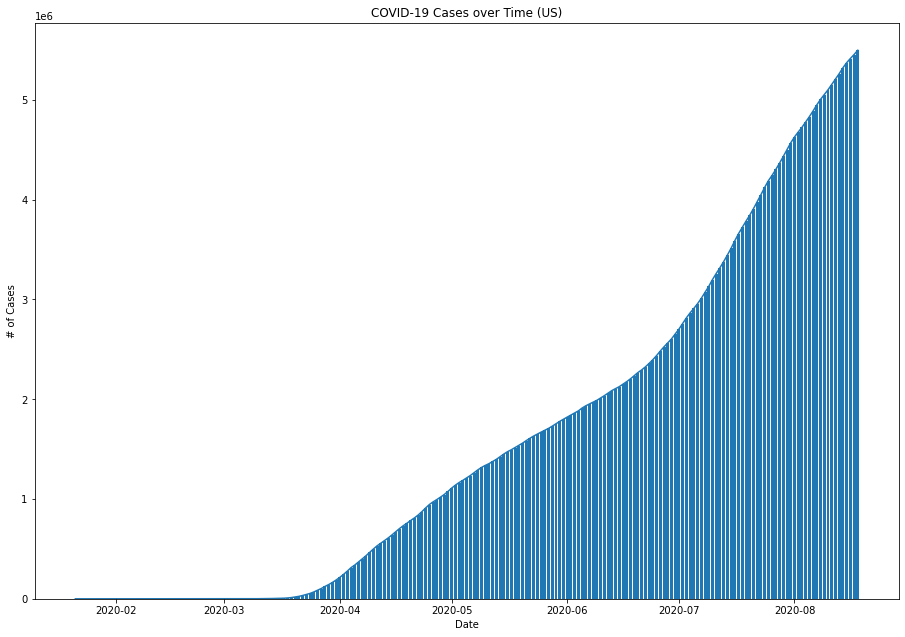

(<Figure size 432x288 with 1 Axes>,
 <function matplotlib.pyplot.bar>,
 <function matplotlib.pyplot.plot>)

In [ ]:
dataVisualization(df_cases,"date", "cases")

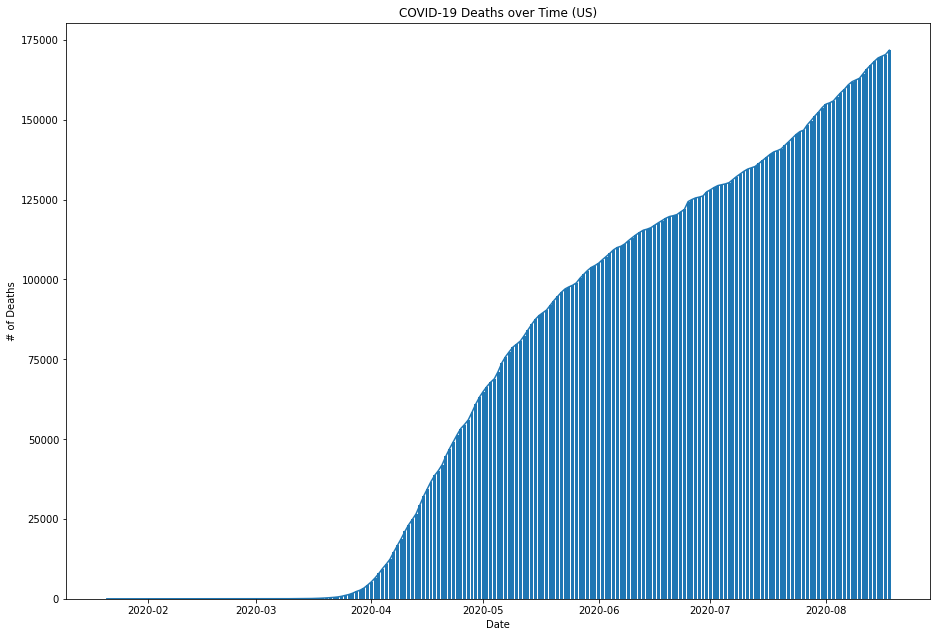

(<Figure size 432x288 with 1 Axes>,
 <function matplotlib.pyplot.bar>,
 <function matplotlib.pyplot.plot>)

In [ ]:
dataVisualization(df_deaths,"date", "deaths")

Revised Version of the Function

In [ ]:
def us_covid19(cases_or_deaths, df_nyt):
  new_df = df_nyt.loc[:,["date", cases_or_deaths]]
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,2])
  dates = new_df["date"]
  info = df[cases_or_deaths]
  plt.plot(dates, info)
  plt.bar(dates, info)
  plt.xlabel("Date")
  plt.ylabel("# of " + cases_or_deaths)
  plt.title("COVID-19 " + cases_or_deaths + " over Time (US)")
  plt.show()

  return plt.show()

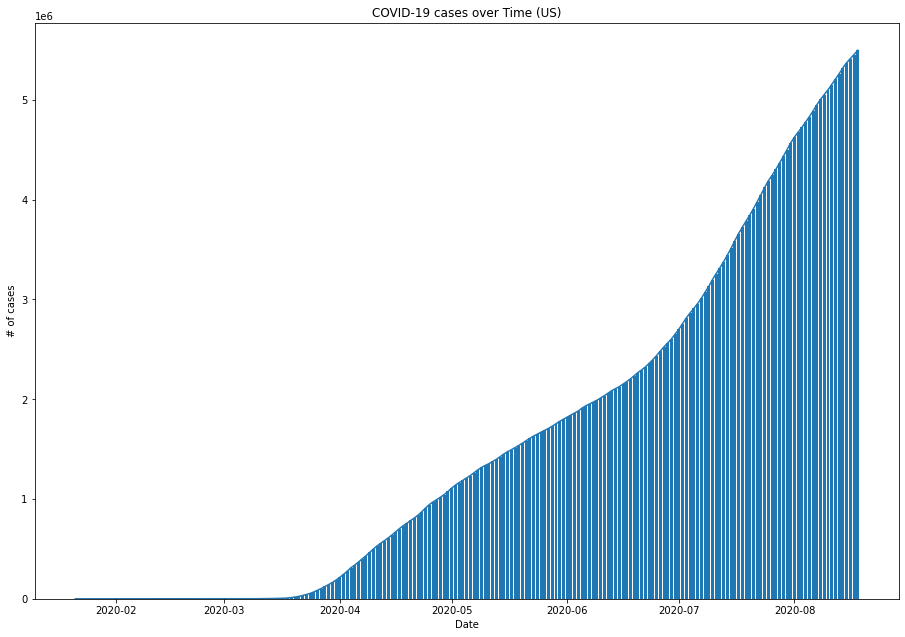

In [ ]:
us_covid19("cases", df)